In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_parquet('escooter_history.parquet', engine='pyarrow')

<AxesSubplot:xlabel='temp', ylabel='atemp'>

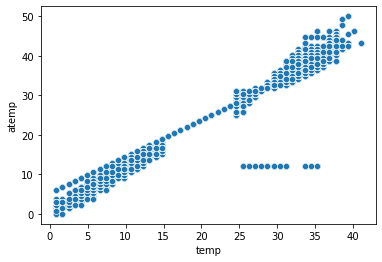

In [3]:
# Before
sns.scatterplot(data=df, x="temp", y="atemp")

In [4]:
def dfDate(y,m,d):
    start = dt.datetime.strptime(f'{y}-{m}-{d} 00:00:00', '%Y-%m-%d %H:%M:%S')
    end = dt.datetime.strptime(f'{y}-{m}-{d+1} 00:00:00', '%Y-%m-%d %H:%M:%S')
    df_fun = df.loc[(df.datetime >= start) & (df.datetime < end)]
    return df_fun

In [5]:
# Erstelle ein DF mit einem Tag vor der 17.8.20

df16 = dfDate(2020,8,16)
# agg pro Stunde
df16['hour'] = df16.datetime.dt.hour
df16 = df16.groupby(['hour'],as_index=False).agg({'atemp':'mean'})


<ipython-input-5-5d39c755f41c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['hour'] = df16.datetime.dt.hour


In [6]:
# Erstelle ein DF mit einem Tag nach der 17.8.20
# start = dt.datetime.strptime('2020-08-18 00:00:00', '%Y-%m-%d %H:%M:%S')
# end = dt.datetime.strptime('2020-08-19 00:00:00', '%Y-%m-%d %H:%M:%S')
df18 = dfDate(2020,8,18)

# agg pro Stunde
df18['hour'] = df18.datetime.dt.hour
df18 = df18.groupby(['hour'],as_index=False).agg({'atemp':'mean'})

<ipython-input-6-3dff26db9594>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['hour'] = df18.datetime.dt.hour


In [7]:
# Erstelle ein merged von df16 und df18 und berechne die Durchnittlische Temperatur
dfmerge = pd.merge(df16,df18, on = 'hour')
dfmerge['avgatemp'] = (dfmerge.atemp_x+dfmerge.atemp_y)/2


In [8]:
# Wechsel jede atemp
df['hour'] = df['datetime'].dt.hour
for i in range(23):
    start = dt.datetime.strptime(f'2020-08-17 {i}:00:00', '%Y-%m-%d %H:%M:%S')
    end = dt.datetime.strptime(f'2020-08-{17} {i+1}:00:00', '%Y-%m-%d %H:%M:%S') 
    df.loc[(df.datetime >= start) & (df.datetime < end) & (df.hour == i), 'atemp'] = dfmerge['avgatemp'][i] 

In [9]:
# Wechsel 23:00 - 23:59
start1 = dt.datetime.strptime(f'2020-08-17 23:00:00', '%Y-%m-%d %H:%M:%S')  
end1 = dt.datetime.strptime(f'2020-08-18 0:00:00', '%Y-%m-%d %H:%M:%S') 
df.loc[(df.datetime >= start1) & (df.datetime < end1) & (df.hour == 23), 'atemp'] = dfmerge['avgatemp'][23]

<AxesSubplot:xlabel='temp', ylabel='atemp'>

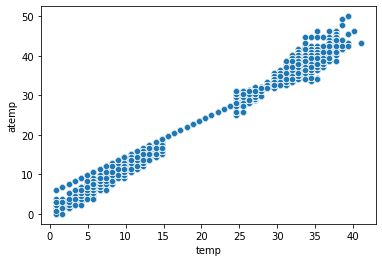

In [10]:
# After
sns.scatterplot(data=df, x="temp", y="atemp")

<AxesSubplot:xlabel='temp', ylabel='atemp'>

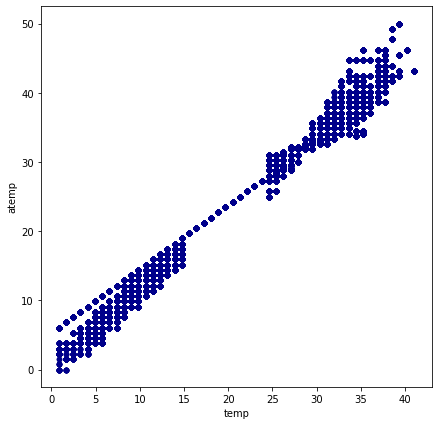

In [11]:
df.plot.scatter(x='temp',
                    y='atemp',
                    c='DarkBlue',figsize=(7,7)) 